In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [7]:
ev_control=pd.read_csv("ev_control.csv",index_col=0)
parcial_c1=pd.read_csv("parcial_c1.csv", index_col=0)

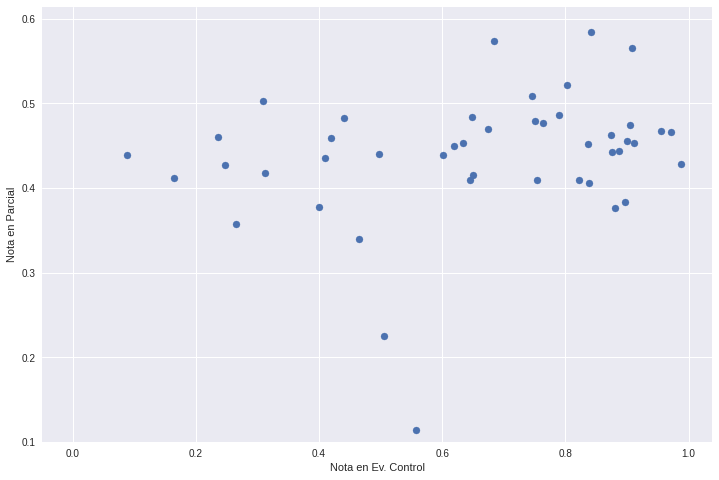

In [8]:
sorted_p1=parcial_c1.sort_index()
sorted_ctrl=ev_control.sort_index()
# sorted_ctrl.drop(columns='CuestionarioControl:Equilibrio Iónico - pH e hidrólisis (Real)', inplace=True)
# sorted_ctrl=todas_evs_c1.sort_index()
plt.style.use("seaborn")
plt.figure(figsize=(12,8))
plt.scatter(sorted_ctrl.mean(axis=1) ,sorted_p1.mean(axis=1))
plt.xlabel("Nota en Ev. Control")
plt.ylabel("Nota en Parcial")
plt.ylim(bottom=.1)
plt.savefig("Notas.png")

In [10]:
sorted_ctrl=sorted_ctrl.rename(columns={
    'Cuestionario:Cuestionario Control 1 (Real)':"T1",
       'Cuestionario:Evaluación de Control (Real)':"T2",
       'Cuestionario:Evaluación de Control: Cinética Química y Equilibrio Químico (Real)':"T3"
})


In [11]:
patron=re.compile(r"(?<=Cuestionario\:)(\w\d)*")
sorted_p1.columns=[re.search(patron, name).group() for name in sorted_p1.columns]

In [12]:
def mejor_nota(df):
    a=df[df.columns[1::2]].max(axis=1)
    b=df[df.columns[::2]].max(axis=1)
    return pd.concat((a,b), axis=1,names=("parte1","parte2"))

In [13]:
temas=[sorted_p1[[col for col in sorted_p1.columns if col_c in col]] for col_c in sorted_ctrl.columns ]
temas=[ mejor_nota(tema) for tema in temas]
temas=[tema.join(sorted_ctrl[evc], on="hash", how="right") for tema, evc in zip(temas, sorted_ctrl.columns)]

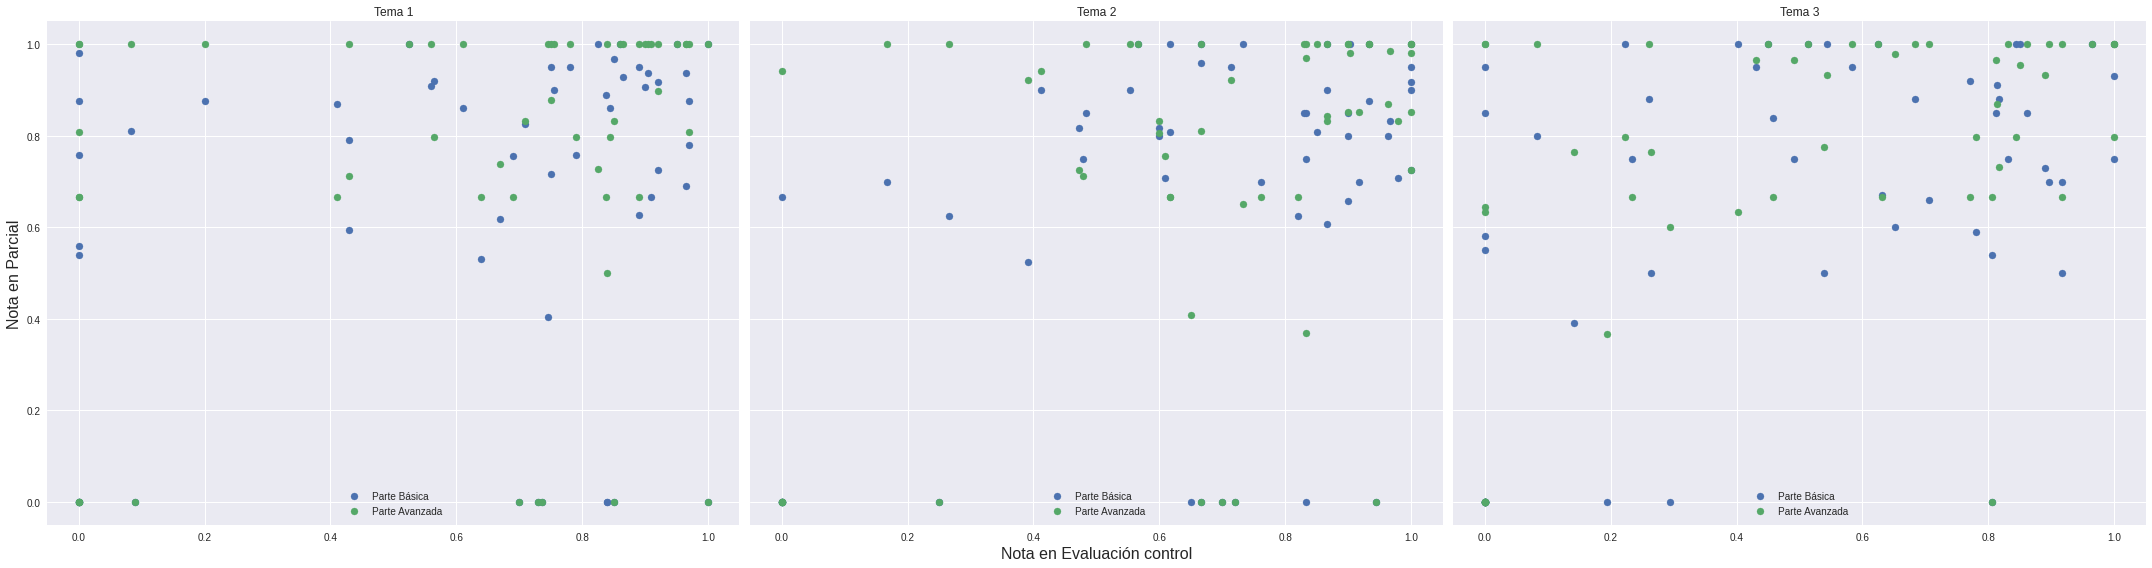

In [14]:
fig,ax=plt.subplots(nrows=1,ncols=3, figsize=(30,8), sharey=True)
ax=ax.flatten()
for n,tema in enumerate(temas):
    ax[n].scatter(tema.iloc[:,-1], tema.iloc[:,:-1][0], label="Parte Básica")
    ax[n].scatter(tema.iloc[:,-1], tema.iloc[:,:-1][1], label="Parte Avanzada")
    ax[n].set_title("Tema {}".format(tema.iloc[:,-1].name[-1]))
    ax[1].set_xlabel("Nota en Evaluación control", fontsize=16)
    ax[0].set_ylabel("Nota en Parcial", fontsize=16)
    ax[n].legend(loc='lower center')
plt.tight_layout()
plt.savefig("disgregado_por_tema.png")